# KF6 - Gamma Spectroscopy


## Table of Content

* [Read experimental data from file](#read)
    * [Loading spectra taken by NaI(Tl) detector](#read_na)
    * [Loading spectra taken by HPGe detector ](#read_ge)

* [Analyzing the data](#fit)
    * [Task 1: Main features of $\gamma$-spectra](#features)
    * [Task 2: Energy calibration of the NaI(Tl) and HPGe detectors](#calibration)
    * [Task 3: Full width at half maximum (FWHM) as a function of a $\gamma$-ray energy](#fwhm)
    * [Task 4: $^{22}$Na $\gamma$-spectrum and relative peak intensity](#na22)
    * [Task 5: $^{137}$Cs and the internal conversion coefficient of $^{137}$Ba](#internal)
    * [Task 6: Binding energy of the deuteron](#deuteron)
    * [Task 7: Background radiation ](#background)

### Importing python packages <a name="import"></a>

In [1]:
#This code cell holds useful code neede for the analysis. Execute it like normal.
# Packages to help importing files 
import sys, os
sys.path.append('./lib')

# Package that supports working with large arrays
import numpy as np  
import pandas as pd

# math
from math import sqrt

# Package for plotting 
import matplotlib   # choose a backend for web applications; remove for stand-alone applications:
matplotlib.use('Agg') # enable interactive notebook plots (alternative: use 'inline' instead of 'notebook'/'widget' for static images)
%matplotlib widget

# The following line is the ONLY one needed in stand-alone applications!
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit

# For uncertainties calculations
from uncertainties import ufloat, ufloat_fromstr, unumpy
from uncertainties.umath import * # sin(), etc...

# Custom pakages prepared for you to analyze experimental data from labs.
# The code is located in the 'lib' subfolder which we have to specify:
sys.path.append('./lib')
import MCA, fittingFunctions

from scipy.odr import ODR, Model, RealData


----------------------------------------------------------------------------------------------------------

# Reading experimental data <a name="read"></a>

## Loading spectra taken by NaI(Tl) detector <a name="read_na"></a>

With the help of the function `load_spectrum` from package `MCA` one can read the experimental data from one data file as follows:

In [2]:
#Load your data files here:
Co60_NaI  = MCA.load_spectrum("Scintillator-60Co.Spe")
Cs137_NaI = MCA.load_spectrum("Scintillator-137Cs.Spe")
Na22_NaI  = MCA.load_spectrum("Scintillator-22Na.Spe")
    

## Loading spectra taken by HPGe detector <a name="read_ge"></a>

In [3]:
#Load your data files here:
Co60_Ge  = MCA.load_spectrum("Semiconductor-60Co.Spe")
Cs137_Ge =  MCA.load_spectrum("Semiconductor-137Cs.Spe")
Na22_Ge  =  MCA.load_spectrum("Semiconductor-22Na.Spe")
Rock_Ge = MCA.load_spectrum("Semiconductor-238U.Spe")



# Convert counts to ufloat objects with uncertainties
#Co60_Ge.counts = [ufloat(count, np.sqrt(count)) for count in Co60_Ge.counts]
#plt.figure()
#plt.errorbar(Co60_Ge.bin_centers, unumpy.nominal_values(Co60_Ge.counts), yerr= unumpy.std_devs(Co60_Ge.counts), fmt='o', capsize=3)




## Loading spectra taken by BGO detector during Neutron lab<a name="read_ambe"></a>

In [4]:
#Load your data files here:
AmBe_BGO = MCA.load_spectrum("BGO.Spe")

# Analyzing the data <a name="fit"></a>

Many help functions have been implemented to help you analyze the data from the lab and the code is stored in [MCA.py](./lib/MCA.py) and [fittingFunctions.py](./lib/fittingFunctions.py). Run [Intro_notebook.ipynb](./Intro_notebook.ipynb) to see loads of examples on how to use the code that we implemented for you for analyzing your data from the gamma lab. Feel free to copy paste cells from the notebook and use them for your analysis.

## Task 1: Main features of $\gamma$-spectra <a name="features"></a>

[0. 0. 0. ... 0. 0. 0.]


Text(0, 0.5, 'Counts')

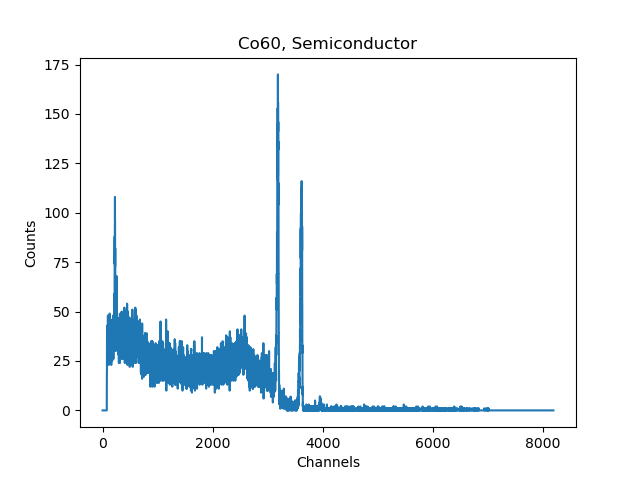

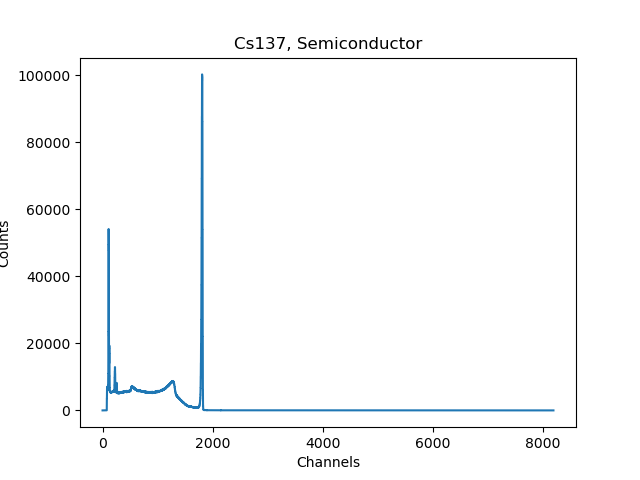

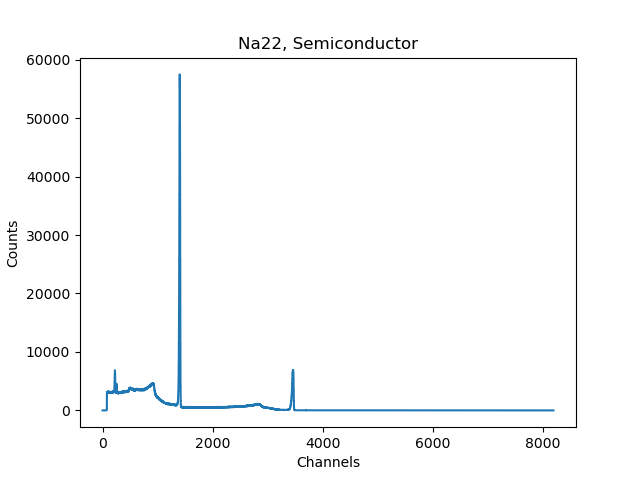

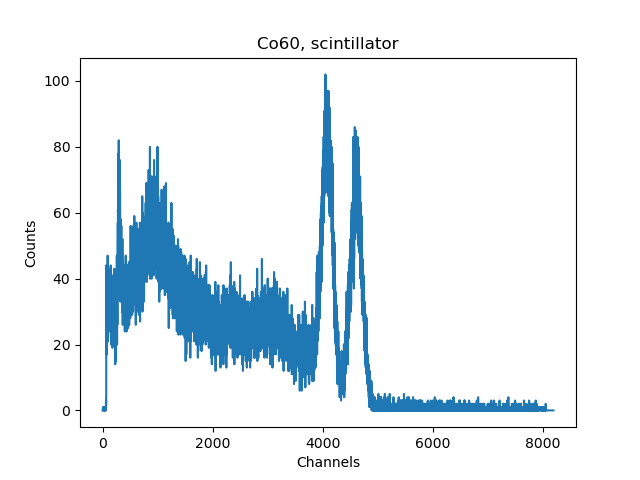

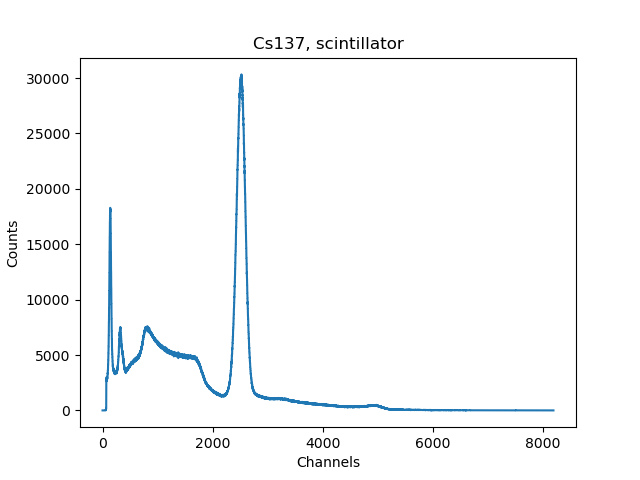

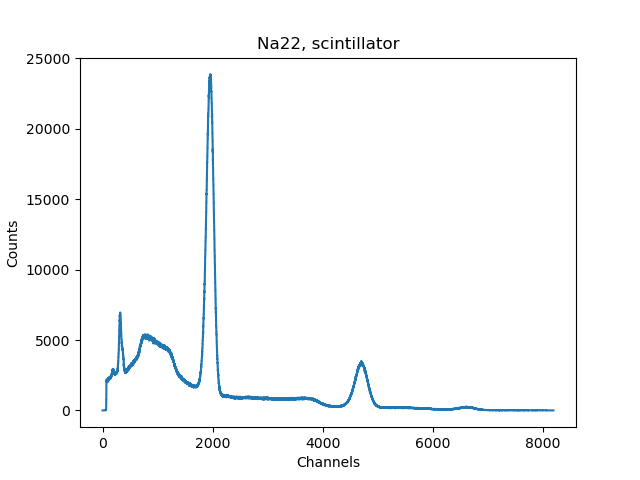

In [5]:
### your code goes here 
plt.figure()
plt.step(Co60_Ge.bin_centers, Co60_Ge.counts, where='mid')
plt.title("Co60, Semiconductor") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
print(Co60_Ge.counts)


plt.figure()
plt.step(Cs137_Ge.bin_centers, Cs137_Ge.counts, where='mid')

plt.title("Cs137, Semiconductor") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 


plt.figure()
plt.step(Na22_Ge.bin_centers, Na22_Ge.counts, where='mid')

plt.title("Na22, Semiconductor") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 

plt.figure()
plt.step(Co60_NaI.bin_centers, Co60_NaI.counts, where='mid')

plt.title("Co60, scintillator") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 

plt.figure()
plt.step(Cs137_NaI.bin_centers, Cs137_NaI.counts, where='mid')

plt.title("Cs137, scintillator") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 

plt.figure()
plt.step(Na22_NaI.bin_centers, Na22_NaI.counts, where='mid')

plt.title("Na22, scintillator") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 


## Task 2: Energy calibration of the NaI(Tl) and HPGe detectors <a name="calibration"></a>

In [6]:
Co60_peak1_NaI_gauss= fittingFunctions.perform_Gaussian_fit(x=Co60_NaI.bin_centers, 
                                              y=Co60_NaI.counts,      
                                              region_start=3600,   # bins where to start fitting
                                              region_stop=4350,    # bins where to stop fitting
                                              mu_guess=4000,       # guess for the position of peak centroid
                                              A_guess=100,         # guess for the amplitude of the peak
                                              sigma_guess=1,
											  printing = 0,
											  plotting = 0)       # guess for the sigma


Co60_peak2_NaI_gauss= fittingFunctions.perform_Gaussian_fit(x=Co60_NaI.bin_centers, 
                                              y=Co60_NaI.counts,      
                                              region_start=4300,   # bins where to start fitting
                                              region_stop=4900,    # bins where to stop fitting
                                              mu_guess=4600,       # guess for the position of peak centroid
                                              A_guess=160,         # guess for the amplitude of the peak
                                              sigma_guess=1,
											  printing = 0,
											  plotting = 0)       # guess for the sigma

Cs137_peak1_NaI_gauss= fittingFunctions.perform_Gaussian_fit(x=Cs137_NaI.bin_centers, 
                                              y=Cs137_NaI.counts,      
                                              region_start=2300,   # bins where to start fitting
                                              region_stop=2750,    # bins where to stop fitting
                                              mu_guess=2500,       # guess for the position of peak centroid
                                              A_guess=30000,         # guess for the amplitude of the peak
                                              sigma_guess=1,
											  printing = 0,
											  plotting = 0)       # guess for the sigma

Na22_peak1_NaI_gauss= fittingFunctions.perform_Gaussian_fit(x=Na22_NaI.bin_centers, 
                                              y=Na22_NaI.counts,      
                                              region_start=1700,   # bins where to start fitting
                                              region_stop=2200,    # bins where to stop fitting
                                              mu_guess=2000,       # guess for the position of peak centroid
                                              A_guess=1e4,         # guess for the amplitude of the peak
                                              sigma_guess=1,
											  printing = 0,
											  plotting = 0)   

Na22_peak2_NaI_gauss= fittingFunctions.perform_Gaussian_fit(x=Na22_NaI.bin_centers, 
                                              y=Na22_NaI.counts,      
                                              region_start=4200,   # bins where to start fitting
                                              region_stop=5300,    # bins where to stop fitting
                                              mu_guess=4700,       # guess for the position of peak centroid
                                              A_guess=1e3,         # guess for the amplitude of the peak
                                              sigma_guess=1,
											  printing = 0,
											  plotting = 0)  



In [7]:
Co60_peak1_ge_gauss= fittingFunctions.perform_Gaussian_fit(x=Co60_Ge.bin_centers, 
                                              y=Co60_Ge.counts,      
                                              region_start=3100,   # bins where to start fitting
                                              region_stop=3250,    # bins where to stop fitting
                                              mu_guess=3150,       # guess for the position of peak centroid
                                              A_guess=170,         # guess for the amplitude of the peak
                                              sigma_guess=1,
											  printing = 0,
											  plotting = 0)       # guess for the sigma

Co60_peak2_ge_gauss= fittingFunctions.perform_Gaussian_fit(x=Co60_Ge.bin_centers, 
                                              y=Co60_Ge.counts,      
                                              region_start=3500,   # bins where to start fitting
                                              region_stop=3700,    # bins where to stop fitting
                                              mu_guess=3600,       # guess for the position of peak centroid
                                              A_guess=160,         # guess for the amplitude of the peak
                                              sigma_guess=1,
											  printing = 0,
											  plotting = 0)       # guess for the sigma

Cs137_peak1_ge_gauss= fittingFunctions.perform_Gaussian_fit(x=Cs137_Ge.bin_centers, 
                                              y=Cs137_Ge.counts,      
                                              region_start=1750,   # bins where to start fitting
                                              region_stop=1880,    # bins where to stop fitting
                                              mu_guess=1800,       # guess for the position of peak centroid
                                              A_guess=1e5,         # guess for the amplitude of the peak
                                              sigma_guess=1,
											  printing = 0,
											  plotting = 0)       # guess for the sigma

Na22_peak1_ge_gauss= fittingFunctions.perform_Gaussian_fit(x=Na22_Ge.bin_centers, 
                                              y=Na22_Ge.counts,      
                                              region_start=1300,   # bins where to start fitting
                                              region_stop=1500,    # bins where to stop fitting
                                              mu_guess=1400,       # guess for the position of peak centroid
                                              A_guess=1e4,         # guess for the amplitude of the peak
                                              sigma_guess=1,
											  printing = 0,
											  plotting = 0)   

Na22_peak2_ge_gauss= fittingFunctions.perform_Gaussian_fit(x=Na22_Ge.bin_centers, 
                                              y=Na22_Ge.counts,      
                                              region_start=3350,   # bins where to start fitting
                                              region_stop=3550,    # bins where to stop fitting
                                              mu_guess=3500,       # guess for the position of peak centroid
                                              A_guess=1e3,         # guess for the amplitude of the peak
                                              sigma_guess=1,
											  printing = 0,
											  plotting = 0)  



Estimate of k_ge = 0.00037312 ± 0.00000097
Estimate of m_ge = -0.01676148 ± 0.00275767


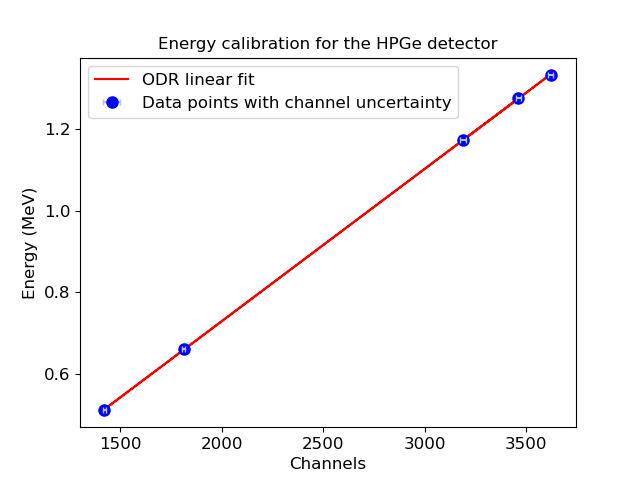

Estimate of k_NaI = 0.00029870 ± 0.00001669
Estimate of m_NaI = -0.07665807 ± 0.06251477


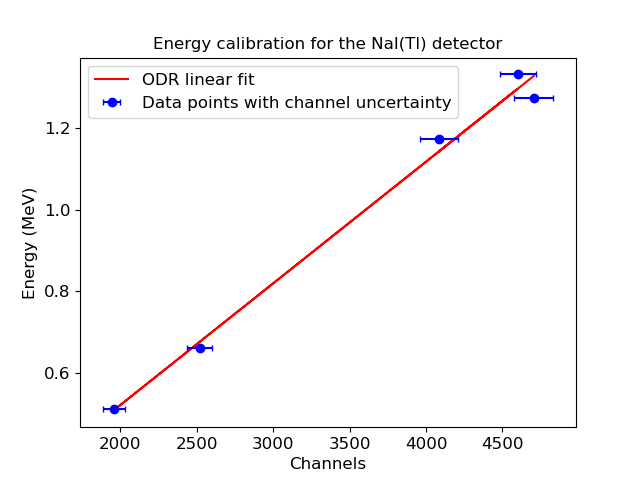

In [147]:
# Data points, including uncertainties on the channels
Co60_peak1_ge = np.array([3187, 1.1732, Co60_peak1_ge_gauss.sigma])  # channel number, energy in MeV, error on channel
Co60_peak2_ge = np.array([3619, 1.3325, Co60_peak2_ge_gauss.sigma])  # channel number, energy in MeV, error on channel
Cs137_peak_ge = np.array([1812, 661.659e-3, Cs137_peak1_ge_gauss.sigma])  # channel number, energy in MeV, error on channel
Na22_peak1_ge = np.array([1420, 0.511, Na22_peak1_ge_gauss.sigma])  # channel number, energy in MeV, error on channel
Na22_peak2_ge = np.array([3461, 1.2746, Na22_peak2_ge_gauss.sigma])  # channel number, energy in MeV, error on channel


channels_ge = np.array([Co60_peak1_ge[0], Co60_peak2_ge[0], Cs137_peak_ge[0], Na22_peak1_ge[0], Na22_peak2_ge[0]])
energy_ge = np.array([Co60_peak1_ge[1], Co60_peak2_ge[1], Cs137_peak_ge[1], Na22_peak1_ge[1], Na22_peak2_ge[1]])
channel_errors_ge = np.array([Co60_peak1_ge[2], Co60_peak2_ge[2], Cs137_peak_ge[2], Na22_peak1_ge[2], Na22_peak2_ge[2]])

# Define the model function
def line_func(p, x):
    k, m = p
    return k * x + m

# Create a Model
model = Model(line_func)

# Create RealData object using data and errors
data = RealData(channels_ge, energy_ge, sx=channel_errors_ge)

# Set up ODR with the model and data
odr = ODR(data, model, beta0=[0.0003, 0])

# Run the regression.
out = odr.run()

# Use the output parameters and parameter standard errors
k_ge, m_ge = out.beta
error_k, error_m = out.sd_beta

print("Estimate of k_ge = {:.8f} ± {:.8f}".format(k_ge, error_k))
print("Estimate of m_ge = {:.8f} ± {:.8f}".format(m_ge, error_m))




plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=12) 

# Plot data and the fit
plt.figure()
plt.errorbar(channels_ge, energy_ge, xerr=channel_errors_ge, fmt='o', capsize=2, color='blue', zorder=2, ms=8, barsabove=True, ecolor='lightsteelblue', label='Data points with channel uncertainty')
plt.plot(channels_ge, line_func(out.beta, channels_ge), label='ODR linear fit', color='red', zorder=1)
plt.legend(loc='upper left')
plt.title("Energy calibration for the HPGe detector")
plt.xlabel("Channels")
plt.ylabel("Energy (MeV)")
plt.savefig('HPGe_calibration.pdf', bbox_inches='tight')
plt.show()
#########################################################################################################



# Data points, including uncertainties on the channels
Co60_peak1_NaI = np.array([4085, 1.1732, Co60_peak1_NaI_gauss.sigma]) # channel numbber, energy in MeV, error  
Co60_peak2_NaI = np.array([4599, 1.3325, Co60_peak2_NaI_gauss.sigma]) # channel numbber, energy in MeV, error        
Cs137_peak_NaI = np.array([2520, 661.659e-3, Cs137_peak1_NaI_gauss.sigma]) # channel numbber, energy in MeV, error    
Na22_peak1_NaI = np.array([1956, 0.511, Na22_peak1_NaI_gauss.sigma]) # channel numbber, energy in MeV, error 
Na22_peak2_NaI = np.array([4705, 1.2746, Na22_peak2_NaI_gauss.sigma]) # channel numbber, energy in MeV, error     


channels_NaI = np.array([Co60_peak1_NaI[0], Co60_peak2_NaI[0], Cs137_peak_NaI[0], Na22_peak1_NaI[0], Na22_peak2_NaI[0]])
energy_NaI = np.array([Co60_peak1_NaI[1], Co60_peak2_NaI[1], Cs137_peak_NaI[1], Na22_peak1_NaI[1], Na22_peak2_NaI[1]])
channel_errors_NaI = np.array([Co60_peak1_NaI[2], Co60_peak2_NaI[2], Cs137_peak_NaI[2], Na22_peak1_NaI[2], Na22_peak2_NaI[2]])

# Define the model function
def line_func(p, x):
    k, m = p
    return k * x + m

# Create a Model
model = Model(line_func)

# Create RealData object using data and errors
data = RealData(channels_NaI, energy_NaI, sx=channel_errors_NaI)

# Set up ODR with the model and data
odr = ODR(data, model, beta0=[0.0003, 0])

# Run the regression.
out = odr.run()

# Use the output parameters and parameter standard errors
k_NaI, m_NaI = out.beta
error_k, error_m = out.sd_beta

print("Estimate of k_NaI = {:.8f} ± {:.8f}".format(k_NaI, error_k))
print("Estimate of m_NaI = {:.8f} ± {:.8f}".format(m_NaI, error_m))

# Plot data and the fit
plt.figure()
plt.errorbar(channels_NaI, energy_NaI, xerr=channel_errors_NaI, fmt='o', capsize=2, color='blue', zorder=2, label='Data points with channel uncertainty')
plt.plot(channels_NaI, line_func(out.beta, channels_NaI), label='ODR linear fit', color='red', zorder=1)
plt.legend(loc='upper left')
plt.title("Energy calibration for the NaI(Tl) detector")
plt.xlabel("Channels")
plt.ylabel("Energy (MeV)")
plt.savefig('NaI_calibration.pdf', bbox_inches='tight')
plt.show()

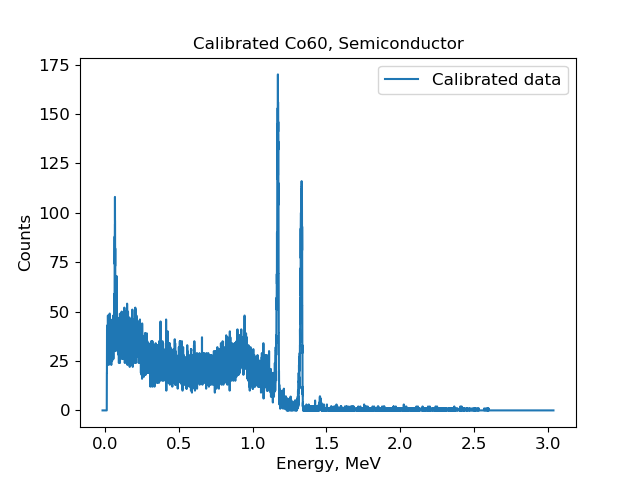

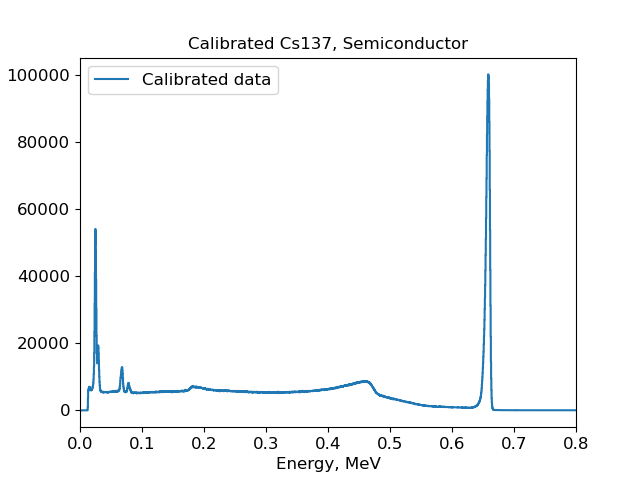

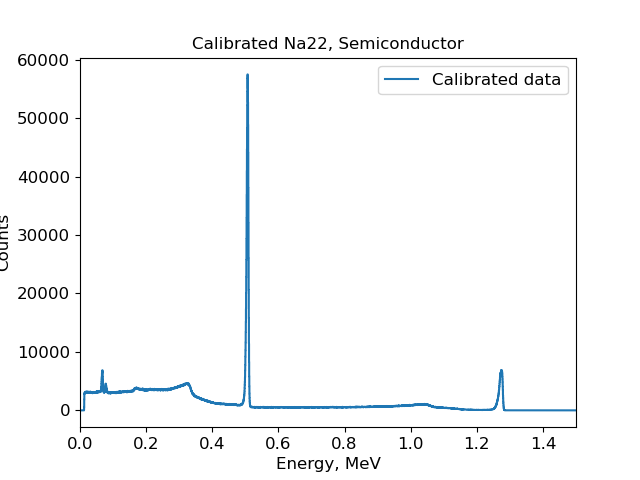

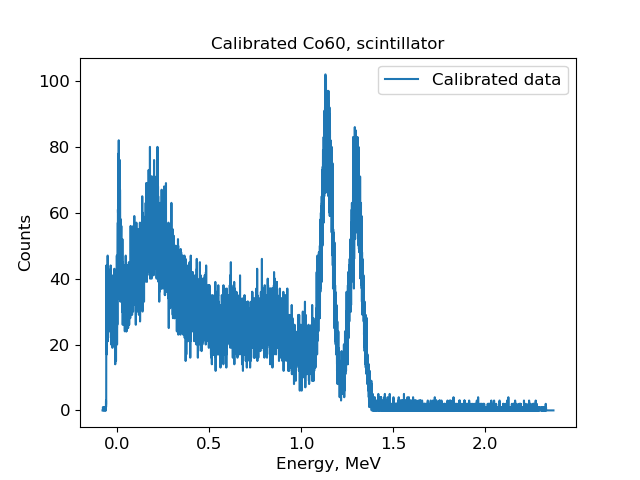

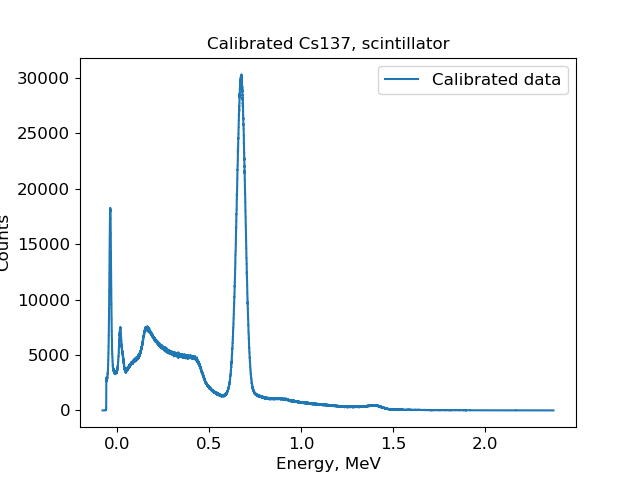

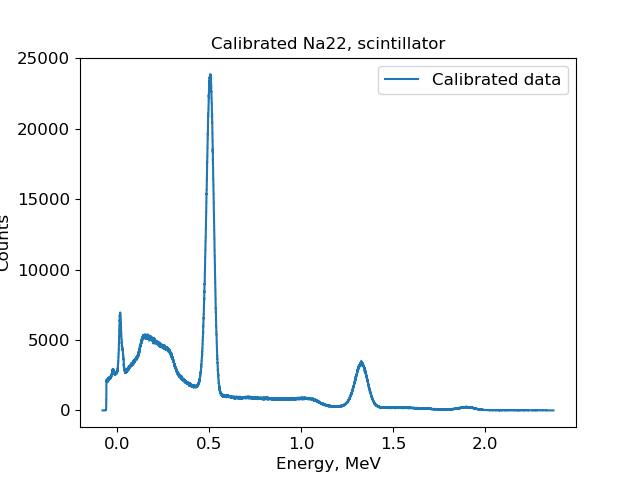

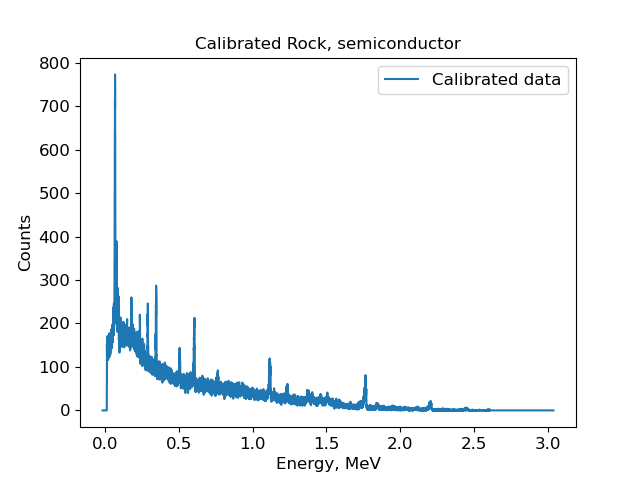

In [152]:
Co60_Ge.calibrate(k_ge, m_ge) ### calibrate 
Cs137_Ge.calibrate(k_ge, m_ge) ### calibrate 
Na22_Ge.calibrate(k_ge, m_ge) ### calibrate 
Rock_Ge.calibrate(k_ge, m_ge) ### calibrate 


plt.figure()
plt.step(Co60_Ge.energy, Co60_Ge.counts, where='mid', label='Calibrated data')
plt.title("Calibrated Co60, Semiconductor") # set title of the plot
plt.ylabel("Counts")       # set label for y-axis 
plt.xlabel("Energy, MeV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()    

plt.figure()
plt.step(Cs137_Ge.energy, Cs137_Ge.counts, where='mid', label='Calibrated data')
plt.title("Calibrated Cs137, Semiconductor") # set title of the plot
plt.ylabel("Counts")       # set label for y-axis 
plt.xlabel("Energy, MeV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.xlim(0, 0.8)
plt.legend()    
plt.savefig('Cs137.svg')

plt.figure()
plt.step(Na22_Ge.energy, Na22_Ge.counts, where='mid', label='Calibrated data')
plt.title("Calibrated Na22, Semiconductor") # set title of the plot
plt.ylabel("Counts")       # set label for y-axis 
plt.xlabel("Energy, MeV")     # set label for x-axis 
plt.xlim(0, 1.5)
plt.legend()    
plt.savefig('Na22.svg')

#############################################################################

Co60_NaI.calibrate(k_NaI, m_NaI) ### calibrate 
Cs137_NaI.calibrate(k_NaI, m_NaI) ### calibrate 
Na22_NaI.calibrate(k_NaI, m_NaI) ### calibrate 

plt.figure()
plt.step(Co60_NaI.energy, Co60_NaI.counts, where='mid', label='Calibrated data')
plt.title("Calibrated Co60, scintillator") # set title of the plot
plt.ylabel("Counts")       # set label for y-axis 
plt.xlabel("Energy, MeV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()    

plt.figure()
plt.step(Cs137_NaI.energy, Cs137_NaI.counts, where='mid', label='Calibrated data')
plt.title("Calibrated Cs137, scintillator") # set title of the plot
plt.ylabel("Counts")       # set label for y-axis 
plt.xlabel("Energy, MeV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()    

plt.figure()
plt.step(Na22_NaI.energy, Na22_NaI.counts, where='mid', label='Calibrated data')
plt.title("Calibrated Na22, scintillator") # set title of the plot
plt.ylabel("Counts")       # set label for y-axis 
plt.xlabel("Energy, MeV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()    

########################################################

plt.figure()
plt.step(Rock_Ge.energy, Rock_Ge.counts, where='mid', label='Calibrated data')
plt.title("Calibrated Rock, semiconductor") # set title of the plot
plt.ylabel("Counts")       # set label for y-axis 
plt.xlabel("Energy, MeV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()  

## Task 3: Full width at half maximum (FWHM) as a function of a $\gamma$-ray energy <a name="fwhm"></a>

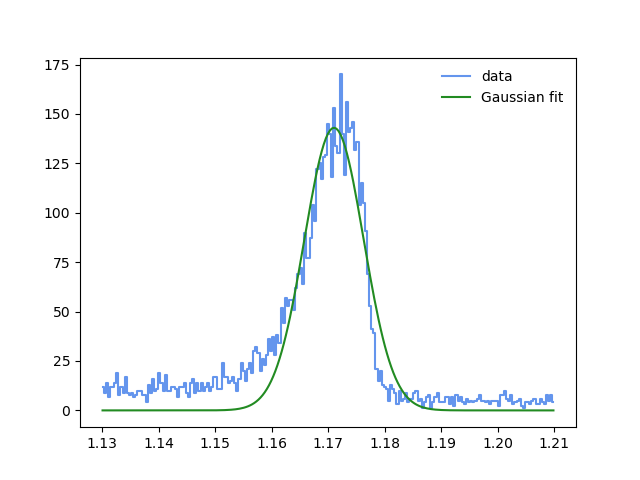

Estimated parameters:
 A = 142.99673, mu = 1.17102,  sigma = 0.00523 

Uncertainties in the estimated parameters: 
 σ²(A) = 9.89560, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[9.89560071e+00 8.05554597e-10 2.41496538e-04]
 [8.05554597e-10 1.76807593e-08 2.94953005e-14]
 [2.41496538e-04 2.94953005e-14 1.76807591e-08]]


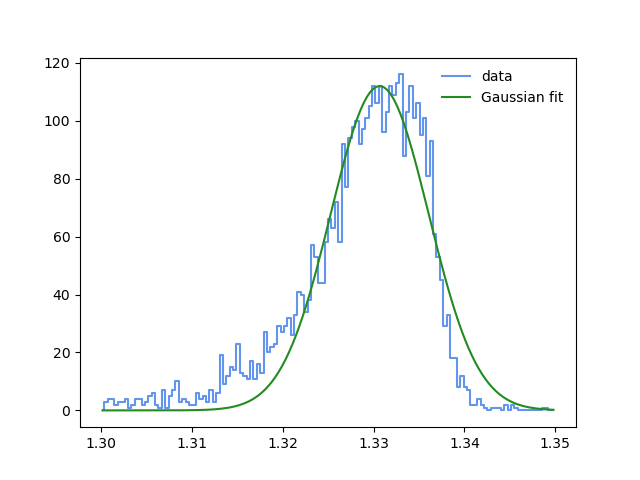

Estimated parameters:
 A = 111.97479, mu = 1.33067,  sigma = 0.00538 

Uncertainties in the estimated parameters: 
 σ²(A) = 5.89534, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 5.89534114e+00 -2.68473559e-09  1.88984853e-04]
 [-2.68473559e-09  1.81727782e-08 -3.17897502e-13]
 [ 1.88984853e-04 -3.17897502e-13  1.81739451e-08]]


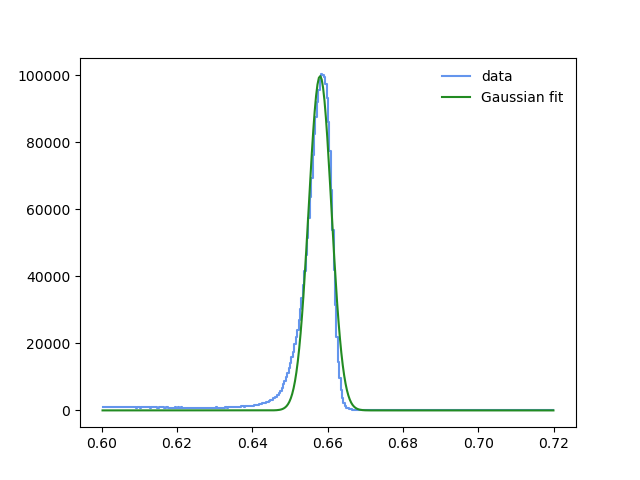

Estimated parameters:
 A = 99755.51560, mu = 0.65797,  sigma = 0.00302 

Uncertainties in the estimated parameters: 
 σ²(A) = 1075166.42095, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 1.07516642e+06  7.05004583e-08 -2.16644100e-02]
 [ 7.05004583e-08  1.30960192e-09 -2.13156808e-15]
 [-2.16644100e-02 -2.13156808e-15  1.30960190e-09]]
Gaussian fit failed! Try specifying another mu_guess.


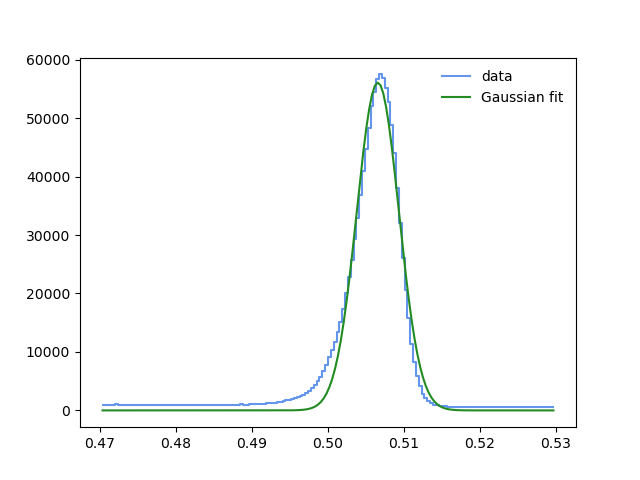

Estimated parameters:
 A = 56080.93910, mu = 0.50657,  sigma = 0.00277 

Uncertainties in the estimated parameters: 
 σ²(A) = 402045.09700, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[4.02045097e+05 3.61035157e-08 1.32446979e-02]
 [3.61035157e-08 1.30897271e-09 1.78285439e-15]
 [1.32446979e-02 1.78285439e-15 1.30897271e-09]]


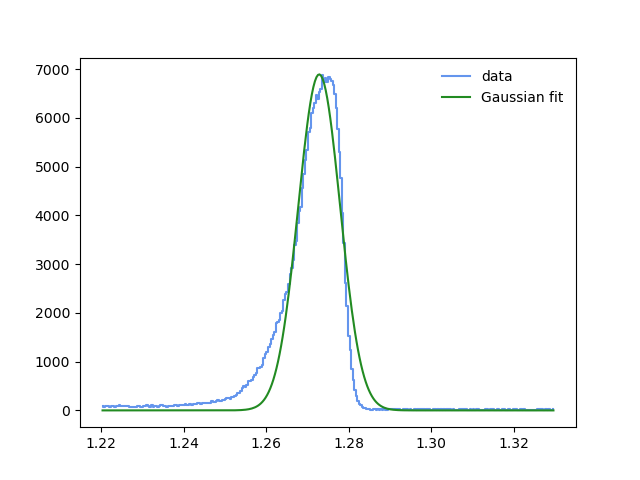

Estimated parameters:
 A = 6894.70149, mu = 1.27285,  sigma = 0.00508 

Uncertainties in the estimated parameters: 
 σ²(A) = 9327.18789, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[9.32718789e+03 1.71064941e-08 4.58324877e-03]
 [1.71064941e-08 6.75643167e-09 1.26058384e-14]
 [4.58324877e-03 1.26058384e-14 6.75643158e-09]]


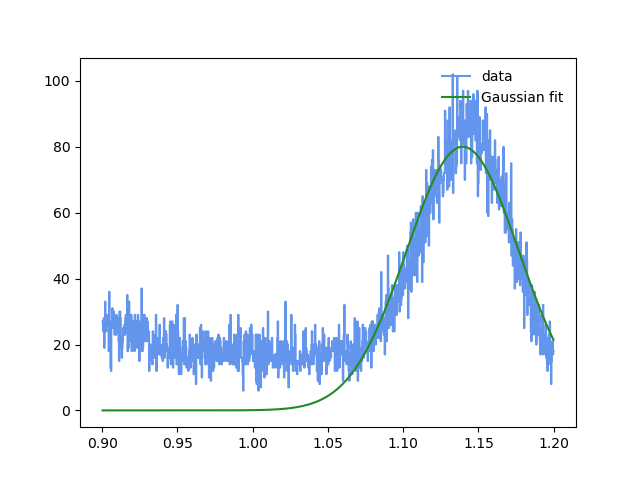

Estimated parameters:
 A = 80.05388, mu = 1.13952,  sigma = 0.03716 

Uncertainties in the estimated parameters: 
 σ²(A) = 1.61803, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 1.61802826e+00 -5.88234272e-05 -5.78840346e-04]
 [-5.88234272e-05  4.90354728e-07  7.96703055e-08]
 [-5.78840346e-04  7.96703055e-08  5.78707877e-07]]


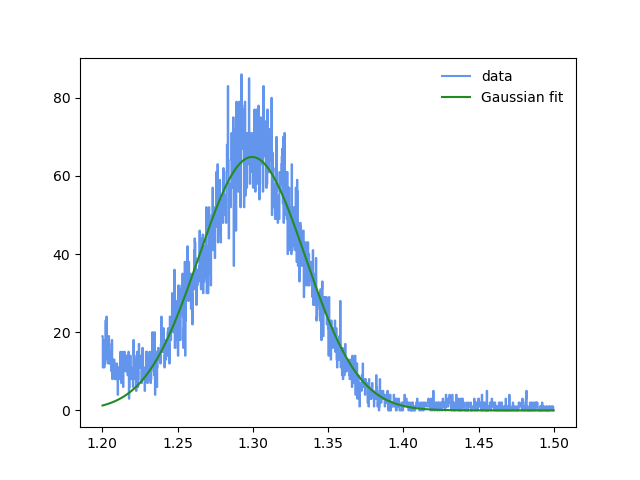

Estimated parameters:
 A = 64.86716, mu = 1.29949,  sigma = 0.03538 

Uncertainties in the estimated parameters: 
 σ²(A) = 0.20932, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[2.09322901e-01 1.17143687e-07 7.63425761e-05]
 [1.17143687e-07 8.29618814e-08 1.44987352e-10]
 [7.63425761e-05 1.44987352e-10 8.33211669e-08]]


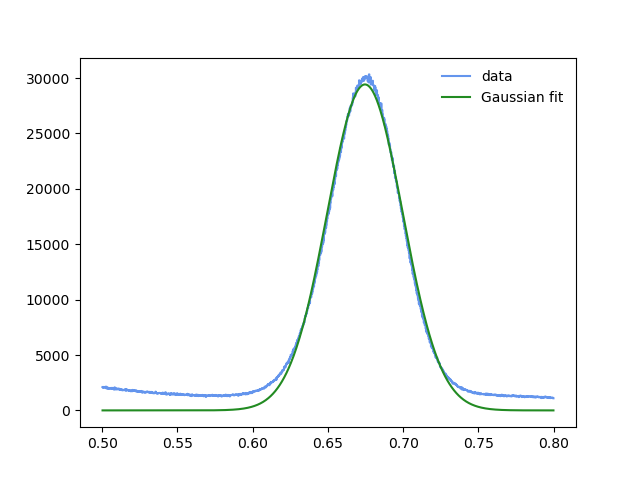

Estimated parameters:
 A = 29418.90957, mu = 0.67463,  sigma = 0.02506 

Uncertainties in the estimated parameters: 
 σ²(A) = 13210.87724, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 1.32108772e+04  3.01103086e-09 -7.50346235e-03]
 [ 3.01103086e-09  1.27853619e-08 -2.56309809e-15]
 [-7.50346235e-03 -2.56309809e-15  1.27853617e-08]]


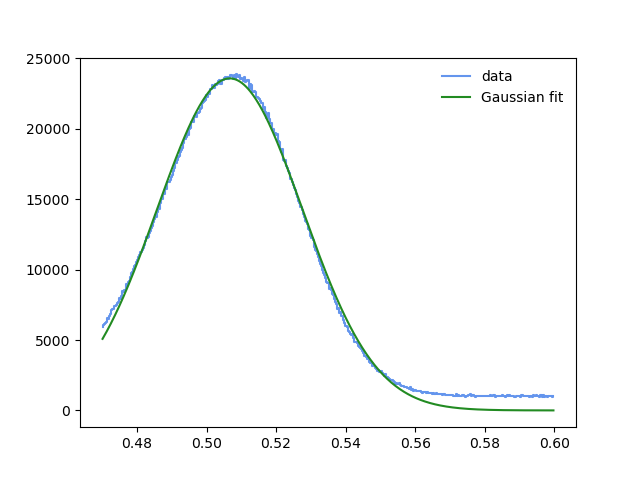

Estimated parameters:
 A = 23584.70201, mu = 0.50668,  sigma = 0.02087 

Uncertainties in the estimated parameters: 
 σ²(A) = 4369.76879, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 4.36976879e+03  2.12867751e-04 -2.87454342e-03]
 [ 2.12867751e-04  4.68154688e-09 -5.20660513e-10]
 [-2.87454342e-03 -5.20660513e-10  5.34246406e-09]]


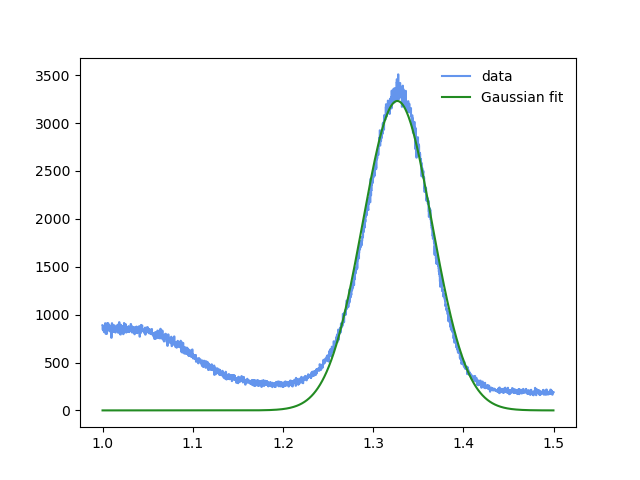

Estimated parameters:
 A = 3230.48925, mu = 1.32670,  sigma = 0.03841 

Uncertainties in the estimated parameters: 
 σ²(A) = 1085.24416, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 1.08524416e+03  4.28271062e-09 -8.60106887e-03]
 [ 4.28271062e-09  2.04502490e-07 -4.89851760e-14]
 [-8.60106887e-03 -4.89851760e-14  2.04502506e-07]]


In [57]:
### your code goes here 


Co60_peak1_Ge = fittingFunctions.perform_Gaussian_fit(x=Co60_Ge.energy, 
                                              y=Co60_Ge.counts,      
                                              region_start=1.13,   # bins where to start fitting
                                              region_stop=1.21,    # bins where to stop fitting
                                              mu_guess=1.17,       # guess for the position of peak centroid
                                              A_guess=170,         # guess for the amplitude of the peak
                                              sigma_guess=1)       # guess for the sigma

Co60_peak2_Ge = fittingFunctions.perform_Gaussian_fit(x=Co60_Ge.energy, 
                                              y=Co60_Ge.counts,      
                                              region_start=1.30,   # bins where to start fitting
                                              region_stop=1.35,    # bins where to stop fitting
                                              mu_guess=1.4,       # guess for the position of peak centroid
                                              A_guess=115,         # guess for the amplitude of the peak
                                              sigma_guess=1)       # guess for the sigma

Cs137_peak1_Ge = fittingFunctions.perform_Gaussian_fit(x=Cs137_Ge.energy, 
                                              y=Cs137_Ge.counts,      
                                              region_start=0.6,   # bins where to start fitting
                                              region_stop=0.72,    # bins where to stop fitting
                                              mu_guess=0.66,       # guess for the position of peak centroid
                                              A_guess=1e5,         # guess for the amplitude of the peak
                                              sigma_guess=1)   # guess for the sigma


Na22_peak1_Ge = fittingFunctions.perform_Gaussian_fit(x=Na22_Ge.energy, 
                                              y=Na22_Ge.counts,      
                                              region_start=0.47,   # bins where to start fitting
                                              region_stop=0.53,    # bins where to stop fitting
                                              mu_guess=0.50,       # guess for the position of peak centroid
                                              A_guess=5.7e3,         # guess for the amplitude of the peak
                                              sigma_guess=1)       # guess for the sigma

Na22_peak2_Ge = fittingFunctions.perform_Gaussian_fit(x=Na22_Ge.energy, 
                                              y=Na22_Ge.counts,      
                                              region_start=1.22,   # bins where to start fitting
                                              region_stop=1.33,    # bins where to stop fitting
                                              mu_guess=1.27,       # guess for the position of peak centroid
                                              A_guess=6.8e3,         # guess for the amplitude of the peak
                                              sigma_guess=1)       # guess for the sigma


Co60_peak1_NaI = fittingFunctions.perform_Gaussian_fit(x=Co60_NaI.energy, 
                                              y=Co60_NaI.counts,      
                                              region_start=0.9,   # bins where to start fitting
                                              region_stop=1.2,    # bins where to stop fitting
                                              mu_guess=1.13,       # guess for the position of peak centroid
                                              A_guess=80,         # guess for the amplitude of the peak
                                              sigma_guess=1)       # guess for the sigma

Co60_peak2_NaI = fittingFunctions.perform_Gaussian_fit(x=Co60_NaI.energy, 
                                              y=Co60_NaI.counts,      
                                              region_start=1.2,   # bins where to start fitting
                                              region_stop=1.5,    # bins where to stop fitting
                                              mu_guess=1.4,       # guess for the position of peak centroid
                                              A_guess=80,         # guess for the amplitude of the peak
                                              sigma_guess=1)       # guess for the sigma

Cs137_peak1_NaI = fittingFunctions.perform_Gaussian_fit(x=Cs137_NaI.energy, 
                                              y=Cs137_NaI.counts,      
                                              region_start=0.5,   # bins where to start fitting
                                              region_stop=0.8,    # bins where to stop fitting
                                              mu_guess=0.7,       # guess for the position of peak centroid
                                              A_guess=1e5,         # guess for the amplitude of the peak
                                              sigma_guess=1)   # guess for the sigma

Na22_peak1_NaI = fittingFunctions.perform_Gaussian_fit(x=Na22_NaI.energy, 
                                              y=Na22_NaI.counts,      
                                              region_start=0.47,   # bins where to start fitting
                                              region_stop=0.6,    # bins where to stop fitting
                                              mu_guess=0.50,       # guess for the position of peak centroid
                                              A_guess=5.7e3,         # guess for the amplitude of the peak
                                              sigma_guess=1)       # guess for the sigma

Na22_peak2_NaI = fittingFunctions.perform_Gaussian_fit(x=Na22_NaI.energy, 
                                              y=Na22_NaI.counts,      
                                              region_start=1.0,   # bins where to start fitting
                                              region_stop=1.5,    # bins where to stop fitting
                                              mu_guess=1.2,       # guess for the position of peak centroid
                                              A_guess=6.8e3,         # guess for the amplitude of the peak
                                              sigma_guess=1)       # guess for the sigma






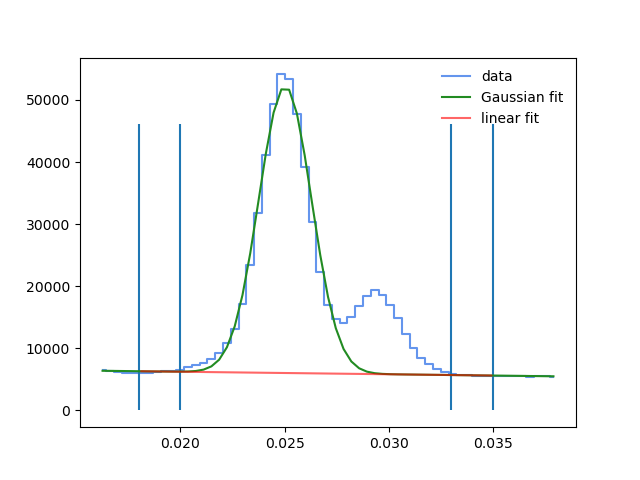

Estimated parameters:
 A = 46150.59893, mu = 0.02502,  sigma = 0.00127 

Uncertainties in the estimated parameters: 
 σ²(A) = 4377823.37367, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[4.37782337e+06 2.37871402e-08 8.00813953e-02]
 [2.37871402e-08 4.39467004e-09 6.49569721e-16]
 [8.00813953e-02 6.49569721e-16 4.39467000e-09]]


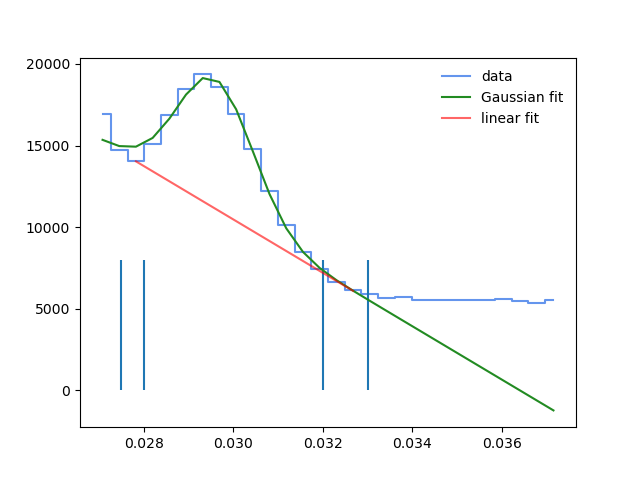

Estimated parameters:
 A = 7969.15216, mu = 0.02960,  sigma = 0.00085 

Uncertainties in the estimated parameters: 
 σ²(A) = 2908466.17340, σ²(mu) = 0.00000, σ²(sigma) = 0.00000 

Covariance matrix: 
 [[ 2.90846617e+06  3.42053922e-05 -2.06599744e-01]
 [ 3.42053922e-05  4.39886672e-08 -7.98298598e-12]
 [-2.06599744e-01 -7.98298598e-12  4.40124526e-08]]


In [116]:
Cs137_peak_xray1_Ge = fittingFunctions.perform_Gaussian_fit(x=Cs137_Ge.energy, 
                                              y=Cs137_Ge.counts,      
                                              region_start=0.016,   # bins where to start fitting
                                              region_stop=0.038,    # bins where to stop fitting
                                              mu_guess=0.03,       # guess for the position of peak centroid
                                              A_guess=2e5,         # guess for the amplitude of the peak
                                              sigma_guess=0.002,
											  left_selection=[0.018, 0.02],
											  right_selection=[0.033, 0.035])   # guess for the sigma

Cs137_peak_xray2_Ge = fittingFunctions.perform_Gaussian_fit(x=Cs137_Ge.energy, 
                                              y=Cs137_Ge.counts,      
                                              region_start=0.027,   # bins where to start fitting
                                              region_stop=0.0375,    # bins where to stop fitting
                                              mu_guess=0.03,       # guess for the position of peak centroid
                                              A_guess=2e5,         # guess for the amplitude of the peak
                                              sigma_guess=0.002,
											  left_selection=[0.0275, 0.028],
											  right_selection=[0.032, 0.033])   # guess for the sigma

In [11]:
print(Na22_peak1_NaI.area())

1234+/-6


0.00013296901550649974
<function FWHM at 0x169012020>
The FWHM are: 0.01233, 0.01268, 0.0071, 0.00653, 0.01197
Energy, FWHM
(1.1732, 0.012327278703145025)
(1.3325, 0.012678828829701476)
(0.661659, 0.007100488204402324)
(1.2746, 0.006526115311143262)
(0.511, 0.01196778062659013)


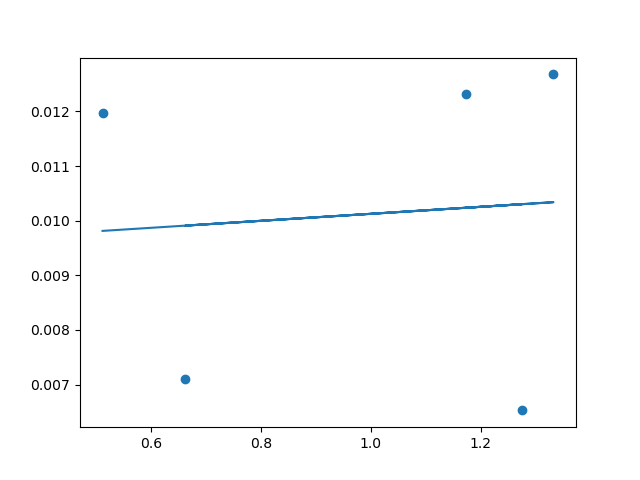

In [119]:
def FWHM(sigma):
    return sigma*2.355

Co60_peak_1 = FWHM(Co60_peak1_Ge.sigma) #FWHM(0.00521) 
Co60_peak_2 = FWHM(Co60_peak2_Ge.sigma) #FWHM((0.00536 ) 
Cs137_peak_3 = FWHM(Cs137_peak1_Ge.sigma) #FWHM(0.00300) 
Na22_peak_4 = FWHM(Na22_peak1_Ge.sigma) #FWHM(0.00506) 
Na22_peak_5 = FWHM(Na22_peak2_Ge.sigma) #FWHM(0.00506) 

print(np.sqrt(Co60_peak1_Ge.covar_matrix[2][2]))

FWHM_list  = np.array([Co60_peak_1, Co60_peak_2, Cs137_peak_3, Na22_peak_4, Na22_peak_5])

print(FWHM)

r = 5

print(f'The FWHM are: {round(Co60_peak_1,r)}, {round(Co60_peak_2,r)}, {round(Cs137_peak_3,r)}, {round(Na22_peak_4,r)}, {round(Na22_peak_5,r)}')
energy = np.array([1.1732, 1.3325, 0.661659, 1.2746, 0.511])

for i in range(len(FWHM_list)):
    ratio = energy[i],FWHM_list[i]
    if i==0:
        print('Energy, FWHM')
    print(ratio)

from scipy.stats import linregress

plt.figure()
kxm = linregress(energy, FWHM_list)
plt.plot(energy, kxm[0]*(energy)+kxm[1]) # One ca nse that the FWHM increases with the energy
    
plt.scatter(energy, FWHM_list)
plt.show()

## Task 4: $^{22}$ Na $\gamma$-spectrum and relative peak intensity <a name="na22"></a>

In [111]:
### your code goes here 

def peak_ratio(I_fe1, I_fe2, eps_pT1, eps_pT2, mu1, mu2):
	return I_fe2 * eps_pT1 * (1 - unumpy.exp(-mu1*7.62))/ (I_fe1 * eps_pT2 * (1 - unumpy.exp(-mu2*7.62)))


eps_pT_peak1 = 0.59
eps_pT_peak2 = 0.33

I_fe_peak1 = Na22_peak1_NaI.area()
I_fe_peak2 = Na22_peak2_NaI.area()
print(I_fe_peak1)
print(I_fe_peak2)

# Source https://www.sciencedirect.com/science/article/pii/0029554X76902913
att_coeff_peak1 = 0.34
att_coeff_peak2 = 0.18

R = peak_ratio(I_fe_peak2, I_fe_peak1, eps_pT_peak2, eps_pT_peak1, att_coeff_peak2, att_coeff_peak1)

print(f"The ratio is R = {R}")


1234+/-6
311+/-5
The ratio is R = 1.790+/-0.029


## Task 5: $^{137}$ Cs and the internal conversion coefficient of $^{137}$ Ba <a name="internal"></a>

In [117]:
### your code goes here 

def alpha(Ife_gamma, Ife_xray, eff_gamma, eff_xray, omega):
	return Ife_xray * eff_gamma / (Ife_gamma * eff_xray * omega)


xray_eff = 0.9
gamma_eff = 0.3

omega = 0.901

I_fe_gamma = Cs137_peak1_Ge.area()
I_fe_xray = Cs137_peak_xray1_Ge.area() + Cs137_peak_xray2_Ge.area()
print(I_fe_gamma)
print(I_fe_xray)

a = alpha(I_fe_gamma, I_fe_xray, gamma_eff, xray_eff, omega)

print(f"The internal conversion coefficient is alpha = {a}")

# https://bricc.anu.edu.au/ , M4 Polarity, alpha = 0.0934(13)


754+/-12
163+/-12
The internal conversion coefficient is alpha = 0.080+/-0.006


## Task 6: Binding energy of the deuteron <a name="deuteron"></a>

In [ ]:
### your code goes here 





## Task 7: Background radiation <a name="background"></a>

The background spectrum that is to be analysed as a part of the lab is named
`background_analysis.csv` and can be found in the current folder. This spectrum
has been measured with another detector and is already calibrated. 

Also plot the mystery "Rock" spectrum and compare it to the background spectrum.

The background spectrum can be read with the help of `MCA.py` as following:

In [ ]:
background = MCA.load_calibrated_spectrum("Gamma_data/Background.txt")

In [ ]:
### your code goes here 



